In [1]:
# Import the .NET class library
import clr, ctypes

# Import python sys module
import sys, os

# numpy import
import numpy as np

# Import c compatible List and String
from System import *
from System.Collections.Generic import List
from System.Runtime.InteropServices import Marshal
from System.Runtime.InteropServices import GCHandle, GCHandleType


# Add needed dll references
sys.path.append(os.environ['LIGHTFIELD_ROOT'])
sys.path.append(os.environ['LIGHTFIELD_ROOT']+"\\AddInViews")
clr.AddReference('PrincetonInstruments.LightFieldViewV5')
clr.AddReference('PrincetonInstruments.LightField.AutomationV5')
clr.AddReference('PrincetonInstruments.LightFieldAddInSupportServices')

# PI imports
from PrincetonInstruments.LightField.Automation import *
from PrincetonInstruments.LightField.AddIns import *


import nidaqmx
import numpy as np
import matplotlib.pyplot as plt

def set_value(setting, value):    
    # Check for existence before setting
    # gain, adc rate, or adc quality
    if experiment.Exists(setting):
        experiment.SetValue(setting, value)

def device_found():
    # Find connected device
    for device in experiment.ExperimentDevices:
        if (device.Type == DeviceType.Camera):
            return True
     
    # If connected device is not a camera inform the user
    print("Camera not found. Please add a camera and try again.")
    return False  

def convert_buffer(net_array, image_format):
    src_hndl = GCHandle.Alloc(net_array, GCHandleType.Pinned)
    try:
        src_ptr = src_hndl.AddrOfPinnedObject().ToInt64()

        # Possible data types returned from acquisition
        if (image_format==ImageDataFormat.MonochromeUnsigned16):
            buf_type = ctypes.c_ushort*len(net_array)
        elif (image_format==ImageDataFormat.MonochromeUnsigned32):
            buf_type = ctypes.c_uint*len(net_array)
        elif (image_format==ImageDataFormat.MonochromeFloating32):
            buf_type = ctypes.c_float*len(net_array)
                    
        cbuf = buf_type.from_address(src_ptr)
        resultArray = np.frombuffer(cbuf, dtype=cbuf._type_)

    # Free the handle 
    finally:        
        if src_hndl.IsAllocated: src_hndl.Free()
        
    # Make a copy of the buffer
    return np.copy(resultArray)


c:\users\raman\miniconda3\envs\control\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The module was found, but not in a referenced namespace.
Implicit loading is deprecated. Please use clr.AddReference('System.Collections').
  if sys.path[0] == '':


In [87]:
N = 100
volts = np.linspace(-.3, .3, N)
X,Y = np.meshgrid(volts, volts)
x = X.flatten()
y = Y.flatten()
stacked = np.vstack([x,y])
stacked

array([[-0.3       , -0.29393939, -0.28787879, ...,  0.28787879,
         0.29393939,  0.3       ],
       [-0.3       , -0.3       , -0.3       , ...,  0.3       ,
         0.3       ,  0.3       ]])

In [88]:
blarg.stop()
blarg.close()

NameError: name 'blarg' is not defined

In [55]:
AOchannels = [0,1]
sampleRate = 100000
numSamplesPerChannel = 50
sampleClockSource = 'PFI0'
devName = 'Dev1'

In [104]:
shutter_task = nidaqmx.Task()
shutter_chan = shutter_task.do_channels.add_do_chan('Dev1/port0/line0')

In [105]:
try:
    task.stop()
    task.close()
except NameError:
    pass
channels = ['Dev1/ao0', 'Dev1/ao1']
task = nidaqmx.Task('galvoAO')
task.ao_channels.add_ao_voltage_chan(channels[0],'x', min_val=-10, max_val=10)
task.ao_channels.add_ao_voltage_chan(channels[1],'y', min_val=-10, max_val=10)

AOChannel(name=y)

In [90]:
task.timing.cfg_samp_clk_timing(sampleRate,
                                source = sampleClockSource,
                                active_edge = nidaqmx.constants.Edge.FALLING,
                                sample_mode= nidaqmx.constants.AcquisitionType.FINITE,
                                samps_per_chan=len(x))

In [91]:
task.write(stacked, auto_start=False)

10000

In [68]:
# Create the LightField Application (true for visible)
# The 2nd parameter forces LF to load with no experiment 
auto = Automation(True, List[String]())
experiment = auto.LightFieldApplication.Experiment
experiment.Load('Pixis')
def set_value(setting, value):    
    # Check for existence before setting
    # gain, adc rate, or adc quality
    if experiment.Exists(setting):
        experiment.SetValue(setting, value)



In [92]:
set_value(CameraSettings.ShutterTimingExposureTime, 20.0)


In [29]:
# experiment.Preview()
# task.write([0,0])

1

In [30]:
# task.write([x,.1])

1

In [33]:
# # stacked = np.vstack([x,y])
# stacked = np.array([[0,0,0,0,0,.1,.1,.1,.1,.1],
#           [0,0,0,0,0,.1,.1,.1,.1,.1]])

In [37]:
# task.write(stacked, auto_start=False)

10

In [93]:
task.start()

In [63]:
task.stop()

In [64]:
task.close()

In [94]:
dataset100 = experiment.Capture(len(x))

In [95]:
shutter_task.write(False)

1

In [22]:
shutter_task.write(True)

1

In [17]:
experiment.Stop()

In [18]:
task.close()

In [19]:
shutter_task.write(False)

1

In [72]:
dataset.Frames

2500

In [78]:
rm_grid = np.zeros([50*50, 1340])


In [74]:
frame = dataset.GetFrame(0,0)

In [76]:
convert_buffer(frame.GetData(), frame.Format).shape

(1340,)

In [84]:
for i in range(N*N):
    frame = dataset.GetFrame(0,i)
    rm_grid[i] = convert_buffer(frame.GetData(), frame.Format)

In [85]:
arr = rm_grid.reshape(50,50,1340)

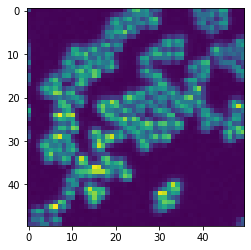

In [86]:
plt.imshow(arr[:,:,664])

In [98]:
rm_grid100 = np.zeros([100*100, 1340])
for i in range(N*N):
    frame = dataset100.GetFrame(0,i)
    rm_grid100[i] = convert_buffer(frame.GetData(), frame.Format)

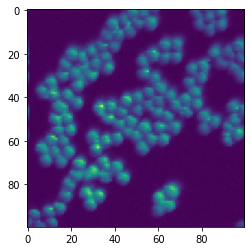

In [101]:
plt.imshow(rm_grid100.reshape(100,100,1340)[:,:,664])

In [102]:
shutter_task.stop()

In [103]:
experiment.Preview()

In [106]:
shutter_task.write(False)

1

In [107]:
experiment.Stop()

In [108]:
auto.Dispose()